In [1]:
# coding: utf-8
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
from numpy import eye
from LoadMZML import LoadMZML
from OptimalMz import OptimalMz
from PlotImage import PlotImage
from TemplateOverlay import TemplateOverlay
% matplotlib inline

# Parameters

In [2]:
class Parameters:
    def __init__(self):
        #  self.filename = '/Users/simon/Dropbox/MS_Ink_Data/ALphabet/abcdefgh_1.mzML'
        self.filename = '..\\data\\abcdefgh_1.mzML'
        self.lines = 8
        self.widthInMM = 62
        self.heightInMM = 10
        self.downMotionInMM = 1.25
        
template_path = '..\\data\\abcdef-F.png'
generated_b = 137
generated_e = 462
template_b = 343
template_e = 1180
plotValues = (374, 376)

Used to find parameters

In [3]:
#PlotImage(loadMZML, param).save("abcdef_gen",plotValues)

In [4]:
param = Parameters()
loadMZML = LoadMZML(param)
plotImage = PlotImage(loadMZML, param)
templateOverlay = TemplateOverlay(loadMZML, param)

Template Image

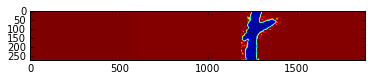

In [5]:
template = Image.open(template_path)
plt.figure()
plt.imshow(np.asarray(template))

Black and White

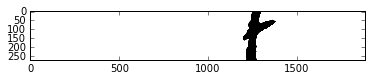

In [6]:
template = templateOverlay.RGBtoBW(template_path)
plt.figure()
plt.imshow(np.asarray(template), cmap='Greys_r')

# Overlay template and generated

100%
49.74s


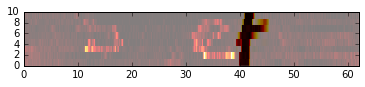

In [7]:
#Scale Template
template = templateOverlay.alignTemplate(generated_b, generated_e, template_b, template_e, template)
#Shift generated
generated = templateOverlay.alignGenerated(generated_b, generated_e, template_b, template_e, plotValues)
#Make both the same size
template, generated = templateOverlay.alignment(template, generated)

plt.figure()
plt.imshow(np.asarray(generated), extent=[0, param.widthInMM, 0, param.heightInMM], interpolation='none', cmap='hot')
plt.imshow(np.asarray(template), extent=[0, param.widthInMM, 0, param.heightInMM], interpolation='none', cmap='hot',
           alpha=0.5)  # 0 fully transparent

# Calculate optimal mass based on template

100%
358.53s
i1 - i:
[-507.09142648  -89.59776805  -55.50012775  -49.01856467  -19.53331249]

mz:
[(354.0, 355.0), (355.0, 356.0), (476.0, 477.0), (359.0, 360.0), (432.0, 433.0)]

i:
[ 2635.41888687   588.39978167   145.91687627  1025.92189896    98.30008541]
i1:
[ 2128.32746039   498.80201362    90.41674851   976.90333429    78.76677291]
c:
[5298 4242  644 4385  528]
c1:
[137965 106143  12347 119419  11521]
range:
1.0
100%
36.55s
100%
31.85s
100%
35.08s
100%
35.91s
100%
31.63s


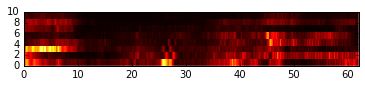

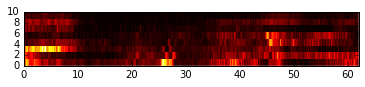

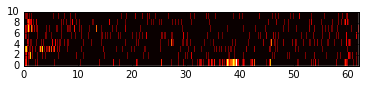

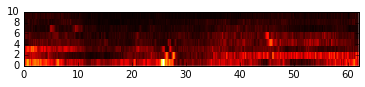

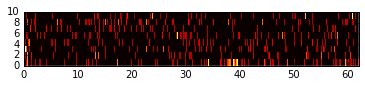

In [9]:
# Calculate optimal mass based on template
optimalMz = OptimalMz.V2(loadMZML, mzRangeLower=0, mzRangeHighest=500, resolution=500,
                         templateClass=templateOverlay)
optimalMz.printN()
# optimalMzII.plot()
for i, j in optimalMz.getN():
    plotImage.plotImshowII((i, j))

100%
173.75s
i1 - i:
[-914.55107652 -186.80870282 -169.27341994 -159.24797894 -147.1709232
 -123.9105946  -102.54765735  -80.2226435   -51.65470485  -45.4959261 ]

mz:
[(354.0, 355.0), (355.0, 356.0), (359.0, 360.0), (315.0, 316.0), (304.0, 305.0), (391.0, 392.0), (309.0, 310.0), (419.0, 420.0), (337.0, 338.0), (494.0, 495.0)]

i:
[ 2975.78935164   670.67170844  1133.19564953   432.04509572   424.68734311
   391.1563483    445.74984177   308.9161123    329.6482528    196.2416044 ]
i1:
[ 2061.23827513   483.86300562   963.92222959   272.79711678   277.51641991
   267.2457537    343.20218441   228.69346881   277.99354795   150.74567829]
c:
[13447 10862 10764  8890 12035  9578  9755  8243 10573  5991]
c1:
[129816  99523 113040  80116  97820  74199  97886  65715  90963  44208]
range:
1.0
100%
35.04s
100%
34.00s
100%
33.94s
100%
32.86s
100%
34.48s
100%
34.81s
100%
34.01s
100%
33.79s
100%
33.85s
100%
32.40s


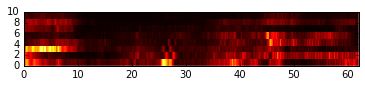

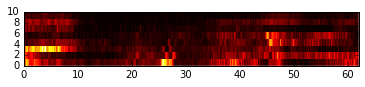

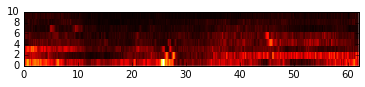

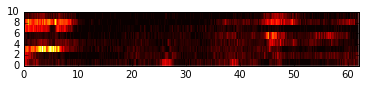

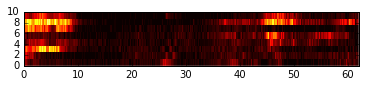

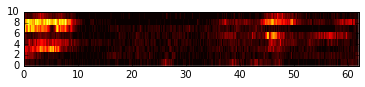

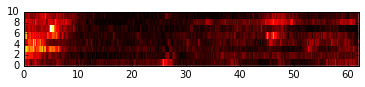

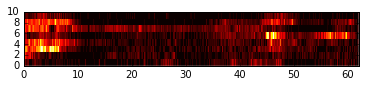

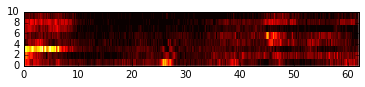

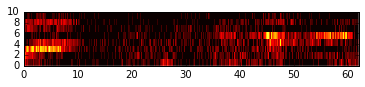

In [10]:
optimalMz = OptimalMz.V1(loadMZML, x_start_mm=45, x_stop_mm=50, y_start_mm=0, y_stop_mm=10, mzRangeLower=300,
                             mzRangeHighest=500, resolution=200)
optimalMz.printN(10)
for i, j in optimalMz.getN(10):
    plotImage.plotImshowII((i, j))